In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [189]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

# drop nan time encoding
approximation_algorithms = approximation_algorithms[approximation_algorithms['Time Encoding'].notnull()]


# remove question marks from time encoding
approximation_algorithms['Time Encoding'] = approximation_algorithms['Time Encoding'].astype(str).str.replace('?', '')
approximation_algorithms['Time Encoding'].value_counts()



Time Encoding
10.0      80
20.0      46
400.0     32
11.0      26
21.0      19
16.0       9
15.0       9
16.24      8
500.0      8
25.0       8
15.015     8
25.02      6
30.0       6
40.0       5
15.41      3
16.1       3
26.5       2
31.0       2
6.0        2
12.0       2
12.1       2
600.0      2
16.5       1
1010.0     1
60.0       1
984.0      1
15.019     1
26.65      1
22.0       1
25.5       1
13.0       1
16.2       1
6.1        1
16.4       1
1045.0     1
6.6        1
15.26      1
15.25      1
25.51      1
25.2       1
26.55      1
21.5       1
25.3       1
27.0       1
15.097     1
41.0       1
Name: count, dtype: int64

In [190]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)


sheet1['Approx Error "Size" (for figures only)'] = '0'

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(
    approximation_algorithms['Family Name'])]

# drop NaN time encoding
sheet1 = sheet1[sheet1['Time Encoding'].notnull()]

sheet1['Time Encoding'].value_counts()


Time Encoding
20         37
11         29
16         17
10         10
30          9
986         7
1000        6
1045        5
10.1        4
15.25       3
1010        3
26.5        2
15.109      2
1020        2
16.1        2
2000        2
21          2
12          2
28.5        1
29.4        1
15.097      1
15.614      1
15.41       1
9000        1
26.1        1
1984        1
960         1
11.585      1
11.1        1
944         1
9122        1
1515        1
52          1
29.2        1
10.0005     1
40          1
11.3        1
16.2        1
15.5        1
15.47       1
15.26       1
15.24       1
15.23       1
15.107      1
15.103      1
15.101      1
988.1       1
15.4        1
988.2       1
15.95       1
16.9        1
942         1
41.1        1
Name: count, dtype: int64

In [191]:
# convert time encoding into a function name following this example: 10 -> comp_fn_10_0000 , 10.5 -> comp_fn_10_5000
def encode_time_to_function_name(time_str):
    # Split on the decimal point
    parts = time_str.split('.')
    integer_part = int(parts[0])
    decimal_part = 0
    if len(parts) > 1:
        decimal_fraction = parts[1] + "0000" 
        decimal_part = int(decimal_fraction[:4])  

    function_name = f"comp_fn_{integer_part:d}_{decimal_part:04d}"
    return function_name

sheet1['Time Encoding Function'] = sheet1['Time Encoding'].apply(encode_time_to_function_name)
approximation_algorithms['Time Encoding Function'] = approximation_algorithms['Time Encoding'].apply(encode_time_to_function_name)

In [192]:
encode_time_to_function_name('6.6')

'comp_fn_6_6000'

In [193]:
import inspect
from complexity_functions import complexity_functions

elements = inspect.getmembers(complexity_functions, inspect.isfunction)
elements_dict = dict(elements)

# check if all time encoding functions are in the complexity_functions module
for time_encoding in sheet1['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(sheet1[sheet1['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


for time_encoding in approximation_algorithms['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(approximation_algorithms[approximation_algorithms['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


In [194]:
sheet1['n = 10^3'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
sheet1['n = 10^6'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
sheet1['n = 10^9'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))

approximation_algorithms['n = 10^3'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
approximation_algorithms['n = 10^6'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
approximation_algorithms['n = 10^9'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))



In [195]:
# list families that are in both datasets
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

common_families = np.intersect1d(sheet1_families, approximation_families)
len(common_families)

approximation_algorithms['Approx Error "Size" (for figures only)'].value_counts()


Approx Error "Size" (for figures only)
1.0    151
2.0     69
4.0     37
2.4     31
2.6     24
Name: count, dtype: int64

In [196]:
# list families that are in approxmaiton_families but not in sheet1_families
missing_families = np.setdiff1d(approximation_families, sheet1_families)
missing_families

array(['Convex Optimization (Non-linear)', 'Root Computation',
       'Wiener Index'], dtype=object)

In [197]:
approximation_families

array(['Sorting', 'Matrix Chain Multiplication', 'Maximum Flow',
       'Matrix Product', 'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'All-Pairs Shortest Paths (APSP)',
       'LU Decomposition', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Convex Optimization (Non-linear)',
       'Optimal Binary Search Trees', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Eigenvalues (Iterative Methods)', 'Root Computation',
       'Nearest Neighbor Search', 'Cardinality Estimation',
       'The Traveling-Salesman Problem', 'The Subset-Sum Problem',
       'The Vertex Cover Problem', 'The Set-Covering Problem',
       'Link Analysis', 'Maximum Cut', 'Wiener Index',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [198]:
sheet1_families

array(['Optimal Binary Search Trees', 'The Subset-Sum Problem', 'Sorting',
       'Matrix Chain Multiplication', 'Maximum Flow', 'Matrix Product',
       'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'LU Decomposition',
       'Nearest Neighbor Search', 'The Traveling-Salesman Problem',
       'All-Pairs Shortest Paths (APSP)',
       'Eigenvalues (Iterative Methods)', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Cardinality Estimation', 'The Vertex Cover Problem',
       'The Set-Covering Problem', 'Link Analysis', 'Maximum Cut',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [199]:
# APSP
# TRaveling salesman problem
# Set cover problems 


# For each family have 3 lines (Any, Constant, Exact)

# log scale
# log log scale
approximation_algorithms[approximation_algorithms['Family Name'] == 'All-Pairs Shortest Paths (APSP)'].sort_values(by=['n = 10^9'])

,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Time Encoding,"Approx Error ""Size"" (for figures only)",Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?,Time Encoding Function,n = 10^3,n = 10^6,n = 10^9
185,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.3]",2022.0,5.01,20.0,4.0,3.01,1.99,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
150,All-Pairs Shortest Paths (APSP),1,1,"APSP, weighted, undirected, no FMM (Approximate)","Baswana, Goyal, Sen",2009.0,5.33,20.0,2.4,3.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
184,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.2]",2022.0,5.01,20.0,2.4,3.00,1.99,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
183,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.1]",2022.0,5.01,20.0,2.4,3.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
182,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Akav, Roditty",2020.0,5.01,20.0,2.4,3.01,2.00,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
180,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Baswana, Gaur, Sen, Upadhyay [Theorem 5]",2008.0,5.00,20.0,2.6,4.50,2.00,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
179,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Baswana, Gaur, Sen, Upadhyay [Theorem 4]",2008.0,5.00,20.0,2.4,4.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
178,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Patrascu, Roditty",2010.0,5.66,20.0,2.4,3.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
177,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, weighted, undirec...","Dory, Forster, Kirkpatrick, Nazari, V. William...",2023.0,5.66,20.0,2.0,3.00,99999.00,multiplicative,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
176,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, weighted, undirec...",Chechik,2015.0,5.50,20.0,2.6,4.50,99999.00,multiplicative,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000


In [200]:
sheet1[sheet1['Family Name'] == 'All-Pairs Shortest Paths (APSP)'].sort_values(by=['n = 10^9'])

,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Time Encoding,Approximate?,Parallel?,Quantum?,"Approx Error ""Size"" (for figures only)",Time Encoding Function,n = 10^3,n = 10^6,n = 10^9
275,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Undirected Graphs with Positive ...,Thorup,1999.0,6.000,20,0.0,0,0.0,0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
272,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Undirected Unweighted Graphs; AP...,Seidel's algorithm,1995.0,5.373,26.1,0.0,0,0.0,0,comp_fn_26_1000,131072469.634588,3447795337603460.0,68019390664990485643264.0
273,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Williams,2014.0,6.000,29.2,0.0,0,0.0,0,comp_fn_29_2000,19267981.943211,5057278433738940.0,2220602994121443431677952.0
277,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Chan,2009.0,6.000,29.4,0.0,0,0.0,0,comp_fn_29_4000,57890116.288099,23349520669587352.0,13543632127907063274668032.0
276,All-Pairs Shortest Paths (APSP),2.0,APSP on Geometrically Weighted Graphs,Chan (Geometrically Weighted),2009.0,5.844,28.5,0.0,0,0.0,0,comp_fn_28_5000,340408189.701001,115877735615512384.0,39445730207527730906398720.0
271,All-Pairs Shortest Paths (APSP),2.0,APSP,Floyd–Warshall algorithm,1962.0,6.000,30,0.0,0,0.0,0,comp_fn_30_0000,1000000000,1000000000000000000,1000000000000000000000000000
270,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Shimbel Algorithm,1953.0,7.000,40,0.0,0,0.0,0,comp_fn_40_0000,1000000000000,1000000000000000000000000,1000000000000000000000000000000000000


In [201]:
1000000000000000000 == 1000000000000000000


True

In [202]:
import pandas as pd
# families = ["All-Pairs Shortest Paths (APSP)", "The Traveling-Salesman Problem", "The Set-Covering Problem"]


def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

APSP_exact = sheet1[sheet1['Family Name'] == 'All-Pairs Shortest Paths (APSP)']
APSP_constant_factor = approximation_algorithms[approximation_algorithms['Family Name'] == 'All-Pairs Shortest Paths (APSP)']

# Filter APSP_constant_factor with correct conditions
APSP_constant_factor = APSP_constant_factor[
    (APSP_constant_factor['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
    (APSP_constant_factor['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
]

APSP_any_error = approximation_algorithms[approximation_algorithms['Family Name'] == 'The Traveling-Salesman Problem']


# Keep only specified columns
columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
APSP_exact = APSP_exact[columns_to_keep]
APSP_constant_factor = APSP_constant_factor[columns_to_keep]
APSP_any_error = APSP_any_error[columns_to_keep]

# Concatenate exact into constant factor and any error
APSP_constant_factor = pd.concat([APSP_constant_factor, APSP_exact], ignore_index=True)
APSP_any_error = pd.concat([APSP_any_error, APSP_exact], ignore_index=True)

# Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
APSP_exact_filtered = filter_lowest_values(APSP_exact)
APSP_constant_factor_filtered = filter_lowest_values(APSP_constant_factor)
APSP_any_error_filtered = filter_lowest_values(APSP_any_error)




In [203]:
APSP_exact_filtered

,Family Name,Algorithm Name,Year,n = 10^9
0,All-Pairs Shortest Paths (APSP),Shimbel Algorithm,1953.0,1000000000000000000000000000000000000
1,All-Pairs Shortest Paths (APSP),Floyd–Warshall algorithm,1962.0,1000000000000000000000000000
2,All-Pairs Shortest Paths (APSP),Seidel's algorithm,1995.0,68019390664990485643264.0
3,All-Pairs Shortest Paths (APSP),Thorup,1999.0,1000000000000000000


In [204]:
APSP_constant_factor_filtered

,Family Name,Algorithm Name,Year,n = 10^9
0,All-Pairs Shortest Paths (APSP),Shimbel Algorithm,1953.0,1000000000000000000000000000000000000
1,All-Pairs Shortest Paths (APSP),Floyd–Warshall algorithm,1962.0,1000000000000000000000000000
2,All-Pairs Shortest Paths (APSP),Seidel's algorithm,1995.0,68019390664990485643264.0
3,All-Pairs Shortest Paths (APSP),Thorup,1999.0,1000000000000000000


In [205]:
APSP_any_error_filtered

,Family Name,Algorithm Name,Year,n = 10^9
0,All-Pairs Shortest Paths (APSP),Shimbel Algorithm,1953.0,1000000000000000000000000000000000000
1,All-Pairs Shortest Paths (APSP),Floyd–Warshall algorithm,1962.0,1000000000000000000000000000
2,The Traveling-Salesman Problem,Clarke-Wright savings heuristic,1964.0,29897352853986263040.0
3,The Traveling-Salesman Problem,"Bellmore, Nemhauser",1968.0,1000000000000000000
4,The Traveling-Salesman Problem,Approximation using Euclidean MST,1974.0,29897352853.986263
5,The Traveling-Salesman Problem,"Bartal, Gottlieb",2013.0,1000000000


In [206]:
from complexity_functions.huge_num import log
# Calculate relative performance improvements
first_value = APSP_exact_filtered['n = 10^9'].iloc[0]
APSP_exact_filtered['Relative Improvement'] = [first_value / x for x in APSP_exact_filtered['n = 10^9']]


# log scale
APSP_exact_filtered['Relative Improvement'] = [log(x) for x in APSP_exact_filtered['Relative Improvement']]

# duplicate last row with current year
last_row = APSP_exact_filtered.iloc[-1:].copy()

# Modify the 'Year' in the copied row
last_row.loc[last_row.index, 'Year'] = 2024

# Append the modified row to the original DataFrame
APSP_exact_filtered = pd.concat([APSP_exact_filtered, last_row], ignore_index=True)
APSP_exact_filtered

,Family Name,Algorithm Name,Year,n = 10^9,Relative Improvement
0,All-Pairs Shortest Paths (APSP),Shimbel Algorithm,1953.0,1000000000000000000000000000000000000,0.000000
1,All-Pairs Shortest Paths (APSP),Floyd–Warshall algorithm,1962.0,1000000000000000000000000000,20.723266
2,All-Pairs Shortest Paths (APSP),Seidel's algorithm,1995.0,68019390664990485643264.0,30.318984
3,All-Pairs Shortest Paths (APSP),Thorup,1999.0,1000000000000000000,41.446532
4,All-Pairs Shortest Paths (APSP),Thorup,2024.0,1000000000000000000,41.446532


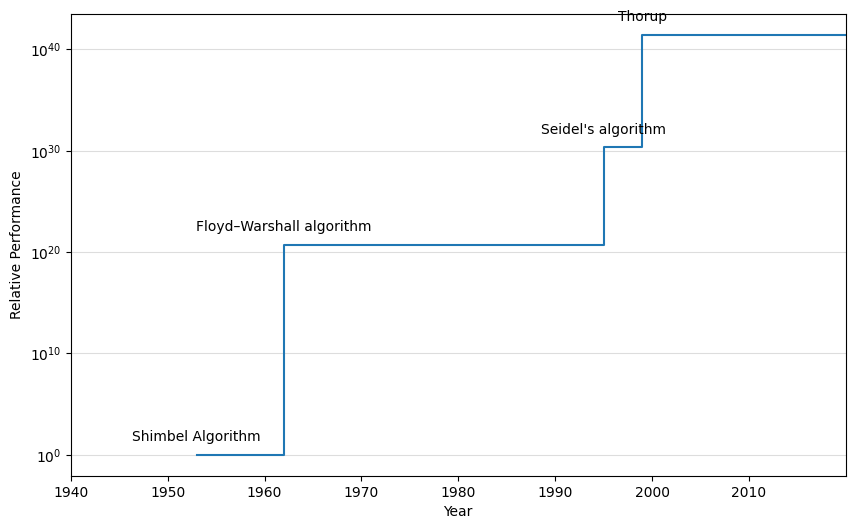

In [207]:

# Plotting the relative performance improvements
plt.figure(figsize=(10, 6))
plt.step(APSP_exact_filtered['Year'], APSP_exact_filtered['Relative Improvement'], where='post',)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Relative Performance')

plt.xlim(1940, 2020)
plt.xticks(np.arange(1940, 2020, 10))


# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))


# ygrid lines
plt.grid(True, which='major', axis='y', linestyle='-', color='#DDD')


# Annotate the points with the algorithm names
for i, row in APSP_exact_filtered.iterrows():
    if i == len(APSP_exact_filtered) - 1:
        continue
    

    plt.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

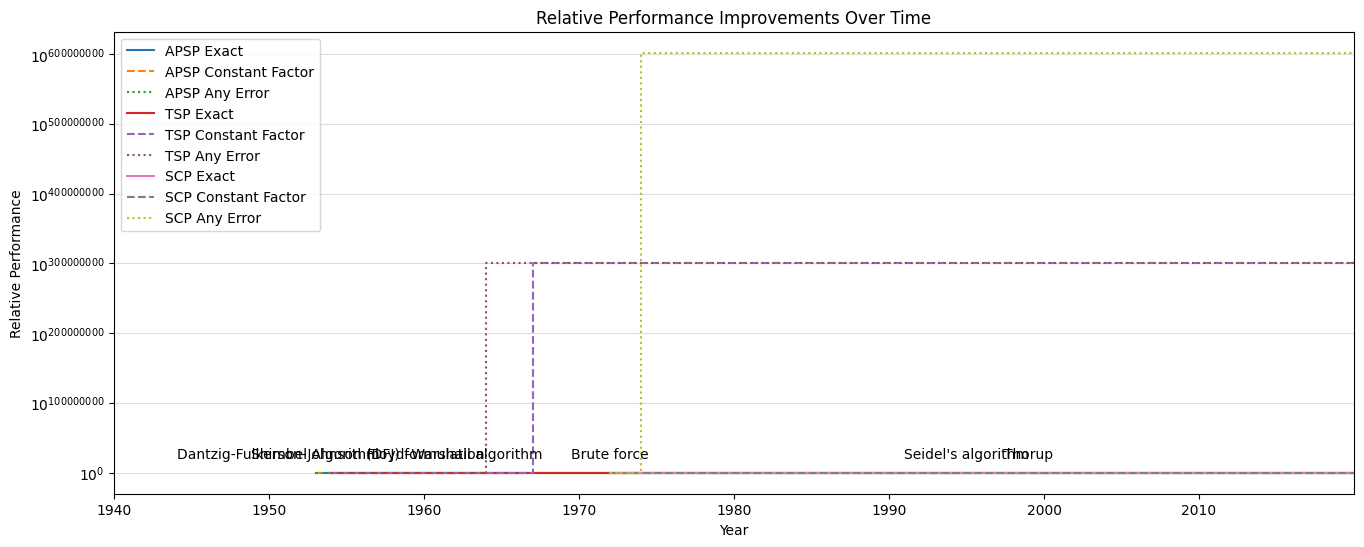

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from complexity_functions.huge_num import log

# Function to filter lowest values for each family
def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

def process_family_data(family_name, exact_df, approx_df):
    exact_data = exact_df[exact_df['Family Name'] == family_name]
    constant_factor_data = approx_df[approx_df['Family Name'] == family_name]
    any_error_data = approx_df[approx_df['Family Name'] == family_name]

    # Filter constant factor with correct conditions
    constant_factor_data = constant_factor_data[
        (constant_factor_data['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
        (constant_factor_data['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
    ]

    # Keep only specified columns
    columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
    exact_data = exact_data[columns_to_keep]
    constant_factor_data = constant_factor_data[columns_to_keep]
    any_error_data = any_error_data[columns_to_keep]

    # Concatenate exact into constant factor and any error
    constant_factor_data = pd.concat([constant_factor_data, exact_data], ignore_index=True)
    any_error_data = pd.concat([any_error_data, exact_data], ignore_index=True)

    # Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
    exact_filtered = filter_lowest_values(exact_data)
    constant_factor_filtered = filter_lowest_values(constant_factor_data)
    any_error_filtered = filter_lowest_values(any_error_data)

    # Calculate relative performance improvements
    first_value = exact_filtered['n = 10^9'].iloc[0]
    exact_filtered['Relative Improvement'] = [first_value / x for x in exact_filtered['n = 10^9']]
    constant_factor_filtered['Relative Improvement'] = [first_value / x for x in constant_factor_filtered['n = 10^9']]
    any_error_filtered['Relative Improvement'] = [first_value / x for x in any_error_filtered['n = 10^9']]

    # Replace NaN or inf values with a small number before applying log2
    exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    constant_factor_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    any_error_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with a small positive number to avoid log issues
    exact_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    constant_factor_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    any_error_filtered['Relative Improvement'].fillna(1e-10, inplace=True)

    # Log scale
    exact_filtered['Relative Improvement'] = [log(x, 10) for x in exact_filtered['Relative Improvement']]
    constant_factor_filtered['Relative Improvement'] = [log(x, 10) for x in constant_factor_filtered['Relative Improvement']]
    any_error_filtered['Relative Improvement'] = [log(x, 10) for x in any_error_filtered['Relative Improvement']]


    # copy last row of each family to the end of the dataframe
    last_row = exact_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    exact_filtered = pd.concat([exact_filtered, last_row], ignore_index=True)

    last_row = constant_factor_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    constant_factor_filtered = pd.concat([constant_factor_filtered, last_row], ignore_index=True)

    last_row = any_error_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    any_error_filtered = pd.concat([any_error_filtered, last_row], ignore_index=True)

    return exact_filtered, constant_factor_filtered, any_error_filtered

# Process data for each family
APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered = process_family_data(
    'All-Pairs Shortest Paths (APSP)', sheet1, approximation_algorithms)
TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered = process_family_data(
    'The Traveling-Salesman Problem', sheet1, approximation_algorithms)
SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered = process_family_data(
    'The Set-Covering Problem', sheet1, approximation_algorithms)
TSP_exact_filtered
# Plotting the relative performance improvements
plt.figure(figsize=(16, 6))

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix):
    plt.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact')
    plt.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', linestyle='--', label=f'{label_prefix} Constant Factor')
    plt.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', linestyle=':', label=f'{label_prefix} Any Error')

    for i, row in exact_filtered.iterrows():
        if i == len(exact_filtered) - 1:
            continue
        
        plt.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center')

plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, 'APSP')
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP')
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1940, 2020)
plt.xticks(np.arange(1940, 2020, 10))
plt.legend()

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))

# ygrid lines
plt.grid(True, which='major', axis='y', linestyle='-', color='#DDD')

# Show the plot
plt.show()


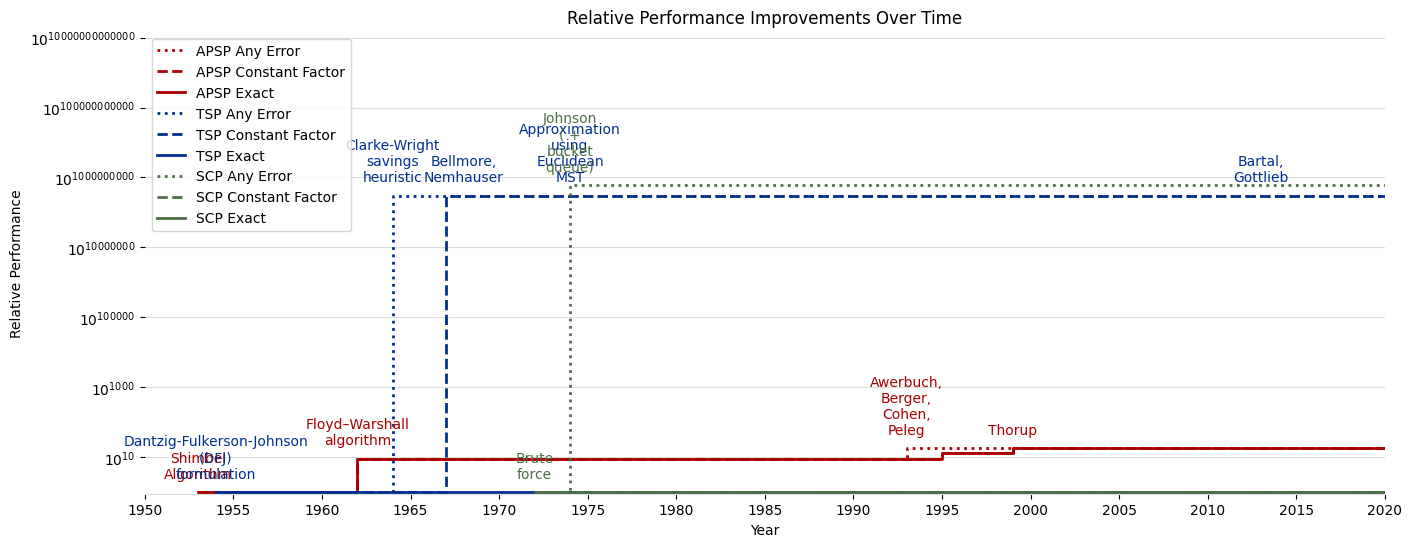

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from complexity_functions.huge_num import log

# Function to filter lowest values for each family
def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

def process_family_data(family_name, exact_df, approx_df):
    exact_data = exact_df[exact_df['Family Name'] == family_name]
    constant_factor_data = approx_df[approx_df['Family Name'] == family_name]
    any_error_data = approx_df[approx_df['Family Name'] == family_name]

    # Filter constant factor with correct conditions
    constant_factor_data = constant_factor_data[
        (constant_factor_data['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
        (constant_factor_data['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
    ]

    # Keep only specified columns
    columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
    exact_data = exact_data[columns_to_keep]
    constant_factor_data = constant_factor_data[columns_to_keep]
    any_error_data = any_error_data[columns_to_keep]

    # Concatenate exact into constant factor and any error
    constant_factor_data = pd.concat([constant_factor_data, exact_data], ignore_index=True)
    any_error_data = pd.concat([any_error_data, exact_data], ignore_index=True)

    # Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
    exact_filtered = filter_lowest_values(exact_data)
    constant_factor_filtered = filter_lowest_values(constant_factor_data)
    any_error_filtered = filter_lowest_values(any_error_data)

    # Calculate relative performance improvements
    first_value = exact_filtered['n = 10^9'].iloc[0]
    exact_filtered['Relative Improvement'] = [first_value / x for x in exact_filtered['n = 10^9']]
    constant_factor_filtered['Relative Improvement'] = [first_value / x for x in constant_factor_filtered['n = 10^9']]
    any_error_filtered['Relative Improvement'] = [first_value / x for x in any_error_filtered['n = 10^9']]

    # Replace NaN or inf values with a small number before applying log2
    exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    constant_factor_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    any_error_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with a small positive number to avoid log issues
    exact_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    constant_factor_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    any_error_filtered['Relative Improvement'].fillna(1e-10, inplace=True)

    # Log scale
    exact_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in exact_filtered['Relative Improvement']]
    constant_factor_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in constant_factor_filtered['Relative Improvement']]
    any_error_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in any_error_filtered['Relative Improvement']]


    # copy last row of each family to the end of the dataframe
    last_row = exact_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    exact_filtered = pd.concat([exact_filtered, last_row], ignore_index=True)

    last_row = constant_factor_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    constant_factor_filtered = pd.concat([constant_factor_filtered, last_row], ignore_index=True)

    last_row = any_error_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    any_error_filtered = pd.concat([any_error_filtered, last_row], ignore_index=True)

    return exact_filtered, constant_factor_filtered, any_error_filtered

# Process data for each family
APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered = process_family_data(
    'All-Pairs Shortest Paths (APSP)', sheet1, approximation_algorithms)
TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered = process_family_data(
    'The Traveling-Salesman Problem', sheet1, approximation_algorithms)
SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered = process_family_data(
    'The Set-Covering Problem', sheet1, approximation_algorithms)

# Plotting the relative performance improvements
fig, ax = plt.subplots(figsize=(16, 6))


colors = [
    ['#AA0000', '#FF033E', '#fd5c63'],
    ['#00308F', '#00FFFF', '#89CFF0'],
    ['#4B6F44', '#7FFF00', '#4FFFB0']
]

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix, color):
    ax.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Any Error', color=color[0],
             linewidth=2, linestyle='dotted')
    ax.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Constant Factor', color=color[0],
             linewidth=2, linestyle='dashed')
    ax.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact', color=color[0], linewidth=2, linestyle='solid')

    for i, row in any_error_filtered.iterrows():
        if i == len(any_error_filtered) - 1:
            continue
        text = ax.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center',
                    fontsize=10, color=color[0], wrap=True
        )
        text._get_wrap_line_width = lambda : 60.

    




plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, 'APSP', colors[0])
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP', colors[1])
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP', colors[2])
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1950, 2020)
plt.xticks(np.arange(1950, 2021, 5))
plt.yscale('log')
# margin top
plt.margins(x=0, y=0.5)
plt.legend()
plt.ylim(bottom=0.9)

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))
ax.set_axisbelow(True)

# ygrid lines
ax.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDD')
# spines behind the line
# New Graph

# Show the plot
plt.show()


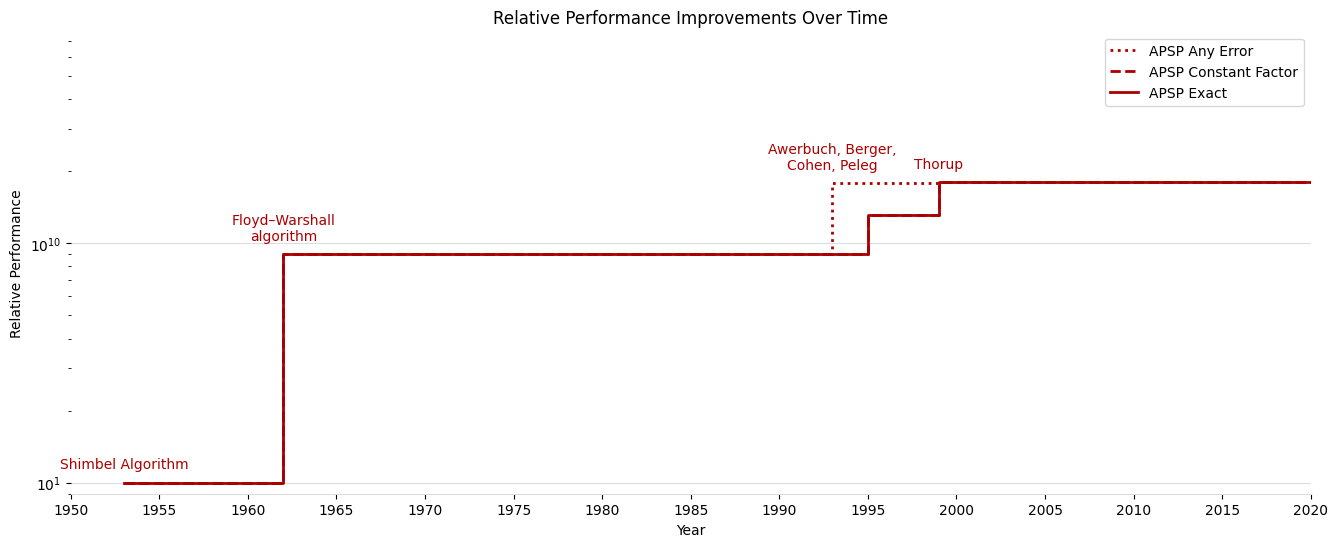

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from complexity_functions.huge_num import log

# Function to filter lowest values for each family
def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

def process_family_data(family_name, exact_df, approx_df):
    exact_data = exact_df[exact_df['Family Name'] == family_name]
    constant_factor_data = approx_df[approx_df['Family Name'] == family_name]
    any_error_data = approx_df[approx_df['Family Name'] == family_name]

    # Filter constant factor with correct conditions
    constant_factor_data = constant_factor_data[
        (constant_factor_data['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
        (constant_factor_data['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
    ]

    # Keep only specified columns
    columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
    exact_data = exact_data[columns_to_keep]
    constant_factor_data = constant_factor_data[columns_to_keep]
    any_error_data = any_error_data[columns_to_keep]

    # Concatenate exact into constant factor and any error
    constant_factor_data = pd.concat([constant_factor_data, exact_data], ignore_index=True)
    any_error_data = pd.concat([any_error_data, exact_data], ignore_index=True)

    # Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
    exact_filtered = filter_lowest_values(exact_data)
    constant_factor_filtered = filter_lowest_values(constant_factor_data)
    any_error_filtered = filter_lowest_values(any_error_data)

    # Calculate relative performance improvements
    first_value = exact_filtered['n = 10^9'].iloc[0]
    exact_filtered['Relative Improvement'] = [first_value / x for x in exact_filtered['n = 10^9']]
    constant_factor_filtered['Relative Improvement'] = [first_value / x for x in constant_factor_filtered['n = 10^9']]
    any_error_filtered['Relative Improvement'] = [first_value / x for x in any_error_filtered['n = 10^9']]

    # Replace NaN or inf values with a small number before applying log2
    exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    constant_factor_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    any_error_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with a small positive number to avoid log issues
    exact_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    constant_factor_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    any_error_filtered['Relative Improvement'].fillna(1e-10, inplace=True)

    # Log scale
    exact_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in exact_filtered['Relative Improvement']]
    constant_factor_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in constant_factor_filtered['Relative Improvement']]
    any_error_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in any_error_filtered['Relative Improvement']]


    # copy last row of each family to the end of the dataframe
    last_row = exact_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    exact_filtered = pd.concat([exact_filtered, last_row], ignore_index=True)

    last_row = constant_factor_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    constant_factor_filtered = pd.concat([constant_factor_filtered, last_row], ignore_index=True)

    last_row = any_error_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    any_error_filtered = pd.concat([any_error_filtered, last_row], ignore_index=True)

    return exact_filtered, constant_factor_filtered, any_error_filtered

# Process data for each family
APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered = process_family_data(
    'All-Pairs Shortest Paths (APSP)', sheet1, approximation_algorithms)
TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered = process_family_data(
    'The Traveling-Salesman Problem', sheet1, approximation_algorithms)
SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered = process_family_data(
    'The Set-Covering Problem', sheet1, approximation_algorithms)

# Plotting the relative performance improvements
fig, ax = plt.subplots(figsize=(16, 6))


colors = [
    ['#AA0000', '#FF033E', '#fd5c63'],
    ['#00308F', '#00FFFF', '#89CFF0'],
    ['#4B6F44', '#7FFF00', '#4FFFB0']
]

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix, color):
    ax.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Any Error', color=color[0],
             linewidth=2, linestyle='dotted')
    ax.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Constant Factor', color=color[0],
             linewidth=2, linestyle='dashed')
    ax.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact', color=color[0], linewidth=2, linestyle='solid')

    for i, row in any_error_filtered.iterrows():
        if i == len(any_error_filtered) - 1:
            continue
        text = ax.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center',
                    fontsize=10, color=color[0], wrap=True
        )
        text._get_wrap_line_width = lambda : 160.

    




plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, 'APSP', colors[0])
# plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP', colors[1])
# plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP', colors[2])
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1950, 2020)
plt.xticks(np.arange(1950, 2021, 5))
plt.yscale('log')
# margin top
plt.margins(x=0, y=0.5)
plt.legend()
plt.ylim(bottom=0.9)

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))
ax.set_axisbelow(True)

# ygrid lines
ax.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDD')
# spines behind the line

# Show the plot
plt.show()


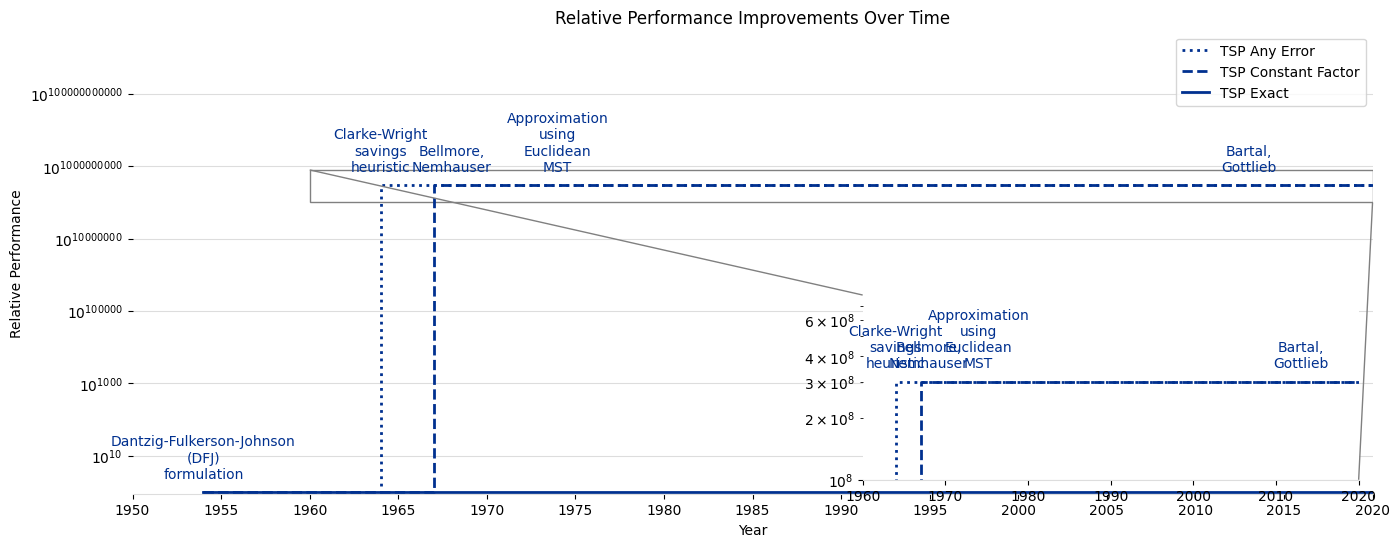

In [211]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Create the main plot
fig, ax = plt.subplots(figsize=(16, 6))

colors = [
    ['#AA0000', '#FF033E', '#fd5c63'],
    ['#00308F', '#00FFFF', '#89CFF0'],
    ['#4B6F44', '#7FFF00', '#4FFFB0']
]

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix, color, ax):
    ax.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Any Error', color=color[0],
             linewidth=2, linestyle='dotted')
    ax.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Constant Factor', color=color[0],
             linewidth=2, linestyle='dashed')
    ax.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact', color=color[0], linewidth=2, linestyle='solid')

    for i, row in any_error_filtered.iterrows():
        if i == len(any_error_filtered) - 1:
            continue
        text = ax.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center',
                    fontsize=10, color=color[0], wrap=True
        )
        text._get_wrap_line_width = lambda : 60.

# Plot the main TSP data
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP', colors[1], ax)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1950, 2020)
plt.xticks(np.arange(1950, 2021, 5))
plt.yscale('log')
plt.margins(x=0, y=0.5)
plt.legend()
plt.ylim(bottom=0.9)

# Custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))
ax.set_axisbelow(True)
ax.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDD')

# Create a zoomed inset plot
ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right", borderpad=1)
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP', colors[1], ax_inset)

# Zoom in on the region of interest
ax_inset.set_xlim(1960, 2020)
ax_inset.set_ylim((10**8), (10**8.9))  # Adjust the y-limits as needed
ax_inset.set_yscale('log')

# Adjust the inset appearance
ax_inset.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax_inset.spines['right'].set_visible(False)
ax_inset.spines['top'].set_visible(False)
ax_inset.spines['left'].set_visible(False)
ax_inset.spines['bottom'].set_color('#DDD')

# Mark the zoomed area in the main plot
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")

# Show the plot with the zoomed inset
plt.show()


In [212]:
TSP_any_error_filtered['Relative Improvement']

0    1.000000e+00
1    3.010300e+08
2    3.010300e+08
3    3.010300e+08
4    3.010300e+08
5    3.010300e+08
Name: Relative Improvement, dtype: float64

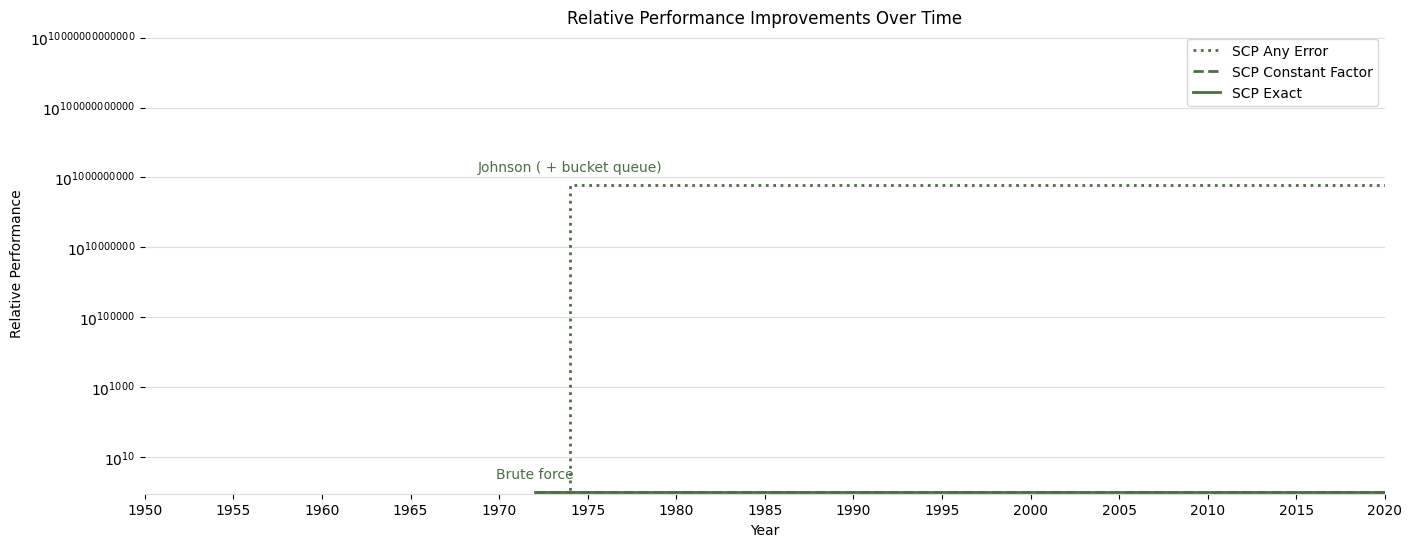

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from complexity_functions.huge_num import log

# Function to filter lowest values for each family
def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

def process_family_data(family_name, exact_df, approx_df):
    exact_data = exact_df[exact_df['Family Name'] == family_name]
    constant_factor_data = approx_df[approx_df['Family Name'] == family_name]
    any_error_data = approx_df[approx_df['Family Name'] == family_name]

    # Filter constant factor with correct conditions
    constant_factor_data = constant_factor_data[
        (constant_factor_data['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
        (constant_factor_data['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
    ]

    # Keep only specified columns
    columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
    exact_data = exact_data[columns_to_keep]
    constant_factor_data = constant_factor_data[columns_to_keep]
    any_error_data = any_error_data[columns_to_keep]

    # Concatenate exact into constant factor and any error
    constant_factor_data = pd.concat([constant_factor_data, exact_data], ignore_index=True)
    any_error_data = pd.concat([any_error_data, exact_data], ignore_index=True)

    # Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
    exact_filtered = filter_lowest_values(exact_data)
    constant_factor_filtered = filter_lowest_values(constant_factor_data)
    any_error_filtered = filter_lowest_values(any_error_data)

    # Calculate relative performance improvements
    first_value = exact_filtered['n = 10^9'].iloc[0]
    exact_filtered['Relative Improvement'] = [first_value / x for x in exact_filtered['n = 10^9']]
    constant_factor_filtered['Relative Improvement'] = [first_value / x for x in constant_factor_filtered['n = 10^9']]
    any_error_filtered['Relative Improvement'] = [first_value / x for x in any_error_filtered['n = 10^9']]

    # Replace NaN or inf values with a small number before applying log2
    exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    constant_factor_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    any_error_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with a small positive number to avoid log issues
    exact_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    constant_factor_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    any_error_filtered['Relative Improvement'].fillna(1e-10, inplace=True)

    # Log scale
    exact_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in exact_filtered['Relative Improvement']]
    constant_factor_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in constant_factor_filtered['Relative Improvement']]
    any_error_filtered['Relative Improvement'] = [(log(x, 10) or 1) for x in any_error_filtered['Relative Improvement']]


    # copy last row of each family to the end of the dataframe
    last_row = exact_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    exact_filtered = pd.concat([exact_filtered, last_row], ignore_index=True)

    last_row = constant_factor_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    constant_factor_filtered = pd.concat([constant_factor_filtered, last_row], ignore_index=True)

    last_row = any_error_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    any_error_filtered = pd.concat([any_error_filtered, last_row], ignore_index=True)

    return exact_filtered, constant_factor_filtered, any_error_filtered

# Process data for each family
APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered = process_family_data(
    'All-Pairs Shortest Paths (APSP)', sheet1, approximation_algorithms)
TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered = process_family_data(
    'The Traveling-Salesman Problem', sheet1, approximation_algorithms)
SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered = process_family_data(
    'The Set-Covering Problem', sheet1, approximation_algorithms)

# Plotting the relative performance improvements
fig, ax = plt.subplots(figsize=(16, 6))


colors = [
    ['#AA0000', '#FF033E', '#fd5c63'],
    ['#00308F', '#00FFFF', '#89CFF0'],
    ['#4B6F44', '#7FFF00', '#4FFFB0']
]

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix, color):
    ax.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Any Error', color=color[0],
             linewidth=2, linestyle='dotted')
    ax.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Constant Factor', color=color[0],
             linewidth=2, linestyle='dashed')
    ax.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact', color=color[0], linewidth=2, linestyle='solid')

    for i, row in any_error_filtered.iterrows():
        if i == len(any_error_filtered) - 1:
            continue
        text = ax.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center',
                    fontsize=10, color=color[0], wrap=True
        )
        text._get_wrap_line_width = lambda : 460.

    




# plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, 'APSP', colors[0])
# plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP', colors[1])
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP', colors[2])
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1950, 2020)
plt.xticks(np.arange(1950, 2021, 5))
plt.yscale('log')
# margin top
plt.margins(x=0, y=0.5)
plt.legend()
plt.ylim(bottom=0.9)

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$10^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))
ax.set_axisbelow(True)

# ygrid lines
ax.grid(True, which='major', axis='y', linestyle='-', color='#DDD')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDD')
# spines behind the line

# Show the plot
plt.show()
